In [1]:
import pandas as pd
import numpy as np


columns = ['Sentiment', 'Id', 'Date', 'Flag', 'Handle', 'Tweet']

tweet_data = pd.read_csv(r'datasets/training.1600000.processed.noemoticon.csv', encoding="ISO-8859-1", names=columns)
tweet_data.head()

,Sentiment,Id,Date,Flag,Handle,Tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [2]:
tweet_data = tweet_data.sample(frac=0.4)

In [3]:
tweet_data['Sentiment'].value_counts()

4    320013
0    319987
Name: Sentiment, dtype: int64

In [4]:
tweet_data =tweet_data.drop(['Date', 'Flag', 'Handle'], axis=1)

In [5]:
tweet_data.replace((4),(1), inplace=True)

In [6]:
import html

tweet_data.Tweet = tweet_data.Tweet.apply(lambda x : html.unescape(x))

In [7]:
import urlextract
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

TAG_REGEX = r'@\w+'
NUMBER_REGEX = r'\d+(?:\.\d*(?:[eE]\d+))?'
PUNCTUATION_REGEX = r'\W+' #must replace with ' '
#EXPRESSION_REGEX = r'[^a-zA-Z0-9\s]\S' will detect :) expressions

url_extractor = urlextract.URLExtract()

nltk.download('stopwords')
stop_words = stopwords.words("english")
stemmer = SnowballStemmer("english")


def clean_tweet(tweet, stem=False):
    tweet = tweet.lower()
    
    urls = list(set(url_extractor.find_urls(tweet)))
    urls.sort(key=lambda url: len(url), reverse=True)
    for url in urls:
        tweet = tweet.replace(url, ' URL ')
    
    tweet = re.sub(TAG_REGEX, 'TAG', tweet)

    tweet = re.sub(NUMBER_REGEX, 'NUMBER', tweet)

    words = []
    for word in tweet.split():
        if word not in stop_words:          
            if word not in ['URL', 'TAG', 'NUMBER']:
                if stem:
                    words.append(stemmer.stem(word))
                else:
                    words.append(word)
            else:
                    words.append(word)

                    
    tweet = ' '.join(words)

    tweet = re.sub(PUNCTUATION_REGEX, ' ', tweet, flags=re.M)
    
        
    return tweet
        

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nathan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
print(list(tweet_data.Tweet)[0])
print('cleaned : ', clean_tweet(list(tweet_data.Tweet)[0], stem=True))

@pamelafox Hi Pamela - I can't see the demos because I still don't have access to the Dev Sandbox ... 
cleaned :  TAG hi pamela can t see demo still access dev sandbox 


In [9]:
%%time
tweet_data.Tweet = tweet_data.Tweet.apply(lambda x: clean_tweet(x, stem=True))

Wall time: 1min 37s


In [10]:
%%time
words = [tweet.split() for tweet in tweet_data.Tweet]

Wall time: 1.17 s


In [11]:
t_words = []
for word in words:
    for w in word:
        t_words.append(w)

In [12]:
from collections import Counter

word_counter = Counter(t_words)

In [13]:
word_counter.most_common()[:100]

[('TAG', 305139),
 ('i', 84696),
 ('NUMBER', 55137),
 ('go', 54714),
 ('m', 54551),
 ('get', 44296),
 ('day', 40332),
 ('good', 36693),
 ('work', 33845),
 ('like', 33398),
 ('URL', 32963),
 ('number', 32815),
 ('love', 32242),
 ('today', 27468),
 ('time', 25206),
 ('got', 24721),
 ('lol', 23791),
 ('t', 23046),
 ('back', 22991),
 ('want', 22757),
 ('miss', 22584),
 ('u', 22365),
 ('one', 22238),
 ('know', 21815),
 ('see', 20585),
 ('think', 20341),
 ('it', 20304),
 ('feel', 20187),
 ('im', 20052),
 ('thank', 19937),
 ('can', 19330),
 ('realli', 18709),
 ('that', 18655),
 ('night', 18027),
 ('watch', 17193),
 ('still', 17191),
 ('hope', 17181),
 ('need', 17164),
 ('make', 17102),
 ('well', 16962),
 ('new', 16863),
 ('home', 16111),
 ('oh', 15857),
 ('look', 15559),
 ('come', 15217),
 ('you', 14926),
 ('much', 14822),
 ('last', 14491),
 ('ll', 13784),
 ('me', 13775),
 ('twitter', 13765),
 ('tomorrow', 13655),
 ('great', 13489),
 ('wish', 13393),
 ('wait', 12871),
 ('haha', 12535),
 ('sad

In [14]:
tweet_data.head()

,Sentiment,Id,Tweet
789216,0,2325327527,TAG hi pamela can t see demo still access dev ...
1279728,1,2001566064,morning vacat italy home play hot wheels kids ...
784020,0,2324059426,TAG i ll probabl blog point when time
91348,0,1759465342,think cat might come back
1046630,1,1957680689,morn all love day mk today sit garden enjoy su...


In [15]:
tweet_data['Sentiment'].value_counts() #difference of 572 

1    320013
0    319987
Name: Sentiment, dtype: int64

In [16]:
negetive_words = []

for tweet in tweet_data[tweet_data.Sentiment == 0].Tweet:
    for word in tweet.split():
        negetive_words.append(word)

In [17]:
neg_counter = Counter(negetive_words)
neg_counter.most_common()[:10]

[('TAG', 122811),
 ('i', 46417),
 ('go', 31337),
 ('m', 30963),
 ('NUMBER', 30159),
 ('get', 24717),
 ('work', 22712),
 ('miss', 18958),
 ('day', 18840),
 ('like', 17283)]

In [18]:
positive_words = []

for tweet in tweet_data[tweet_data.Sentiment == 1].Tweet:
    for word in tweet.split():
        positive_words.append(word)

In [19]:
pos_counter = Counter(positive_words)
pos_counter.most_common()[:10]

[('TAG', 182328),
 ('i', 38279),
 ('good', 24991),
 ('NUMBER', 24978),
 ('love', 23781),
 ('m', 23588),
 ('go', 23377),
 ('URL', 21853),
 ('day', 21492),
 ('get', 19579)]

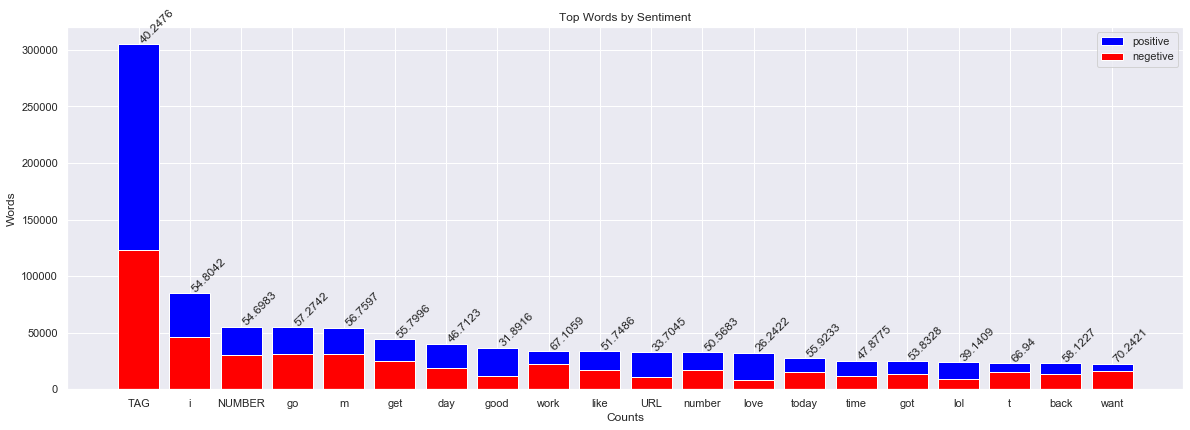

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

sns.set(rc={'figure.figsize':(20,20/3)})

values =  [x[1] for x in word_counter.most_common()[:20]]
words = [x[0] for x in word_counter.most_common()[:20]]

pos_words = [pos_counter[w] for w in words]
neg_words = [neg_counter[w] for w in words]

plt.bar(words, pos_words, width= 0.8, label='positive', color='blue', bottom=neg_words)
plt.bar(words, neg_words, width= 0.8, label='negetive', color='red')


for i in range(len(words)):
    plt.text(i, values[i] + 1000, 
             str(round((neg_words[i]/values[i]) * 100, 4)),  
             rotation=45)


plt.ylabel("Words")
plt.xlabel("Counts")
plt.legend(loc="upper right")
plt.title("Top Words by Sentiment")

plt.show()

# Moving on to Vectorizing

In [21]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(tweet_data.Tweet)

In [22]:
word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1

In [23]:
word_index

{'tag': 1,
 'number': 2,
 'i': 3,
 'go': 4,
 'm': 5,
 'get': 6,
 'day': 7,
 'good': 8,
 'work': 9,
 'like': 10,
 'url': 11,
 'love': 12,
 'today': 13,
 'time': 14,
 'got': 15,
 'lol': 16,
 't': 17,
 'back': 18,
 'want': 19,
 'miss': 20,
 'u': 21,
 'one': 22,
 'know': 23,
 'see': 24,
 'think': 25,
 'it': 26,
 'feel': 27,
 'im': 28,
 'thank': 29,
 'can': 30,
 'realli': 31,
 'that': 32,
 'night': 33,
 'watch': 34,
 'still': 35,
 'hope': 36,
 'need': 37,
 'make': 38,
 'well': 39,
 'new': 40,
 'home': 41,
 'oh': 42,
 'look': 43,
 'come': 44,
 'you': 45,
 'much': 46,
 'last': 47,
 'll': 48,
 'me': 49,
 'twitter': 50,
 'tomorrow': 51,
 'great': 52,
 'wish': 53,
 'wait': 54,
 'haha': 55,
 'sad': 56,
 'sleep': 57,
 'now': 58,
 'fun': 59,
 'bad': 60,
 'right': 61,
 'would': 62,
 'tri': 63,
 'week': 64,
 'tonight': 65,
 'v': 66,
 'way': 67,
 'thing': 68,
 'say': 69,
 'take': 70,
 'happi': 71,
 'follow': 72,
 'though': 73,
 'gonna': 74,
 'nice': 75,
 'better': 76,
 'morn': 77,
 'hate': 78,
 'frien

In [24]:
len(negetive_words + positive_words)/len(tweet_data.Tweet) #average amount of words per tweet

8.3143078125

In [25]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_tweets = pad_sequences(tokenizer.texts_to_sequences(tweet_data.Tweet), maxlen=30)

In [26]:
train_tweets[1]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,   158,   929,
        3960,    41,    93,   189, 11031,  1209,  2981,   140,   218,
         834,  1033,   131])

In [27]:
reverse_word_map = dict(map(reversed, tokenizer.word_index.items()))

w = []
for i in train_tweets[1]:
    w.append(reverse_word_map.get(i))
    
print(w)

[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, 'morning', 'vacat', 'italy', 'home', 'play', 'hot', 'wheels', 'kids', 'tiger', 'eat', 'car', 'random', 'race', 'cool']


In [28]:
train_y = tweet_data.Sentiment.to_list()

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_tweets, train_y, test_size=0.2, random_state=420)

# GloVe word embedding

In [29]:
embeddings_index = {} #holds the glove vectors

#this is just to transform a list of lists into a dict ['cat', 2.3434, 234234.3243, 23423.34] -> {'cat':[2.3434, 234234.3243],}

f = open('transfers/glove.6B.300d.txt', encoding="utf8")
for line in f:
    values = line.split()
    word = value = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print(len(embeddings_index))

400000


In [30]:
embedding_matrix = np.zeros((vocab_size, 300)) #300 is the embedding dimension

#converts the dict into a 2d matrix so it can be embedded into the neural network

for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [31]:
import tensorflow as tf

embedding_layer = tf.keras.layers.Embedding(vocab_size,
                                           300,
                                           weights=[embedding_matrix],
                                            input_length=30, #30 is the max sequence length for the tweets
                                            trainable=False, #setting trainable to false because we want to keep as is
                                           )

# Creating a Sequential Model

In [39]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Flatten

model = Sequential()
model.add(embedding_layer)
model.add(Dropout(0.5))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 30, 300)           44914800  
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 300)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 45,075,301
Trainable params: 160,501
Non-trainable params: 44,914,800
_________________________________________________________________


In [40]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [42]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

callbacks = [ ReduceLROnPlateau(monitor='val_loss', patience=5, cooldown=0),
              EarlyStopping(monitor='val_acc', min_delta=1e-4, patience=5)]

In [57]:
%%time

history = model.fit(X_train, np.array(y_train), batch_size=1024, epochs=10,
                    validation_data=(X_test, np.array(y_test)), verbose=1, callbacks=callbacks)

Epoch 1/10
500/500 [==============================] - 241s 483ms/step - loss: 0.5525 - accuracy: 0.7126 - val_loss: 0.5126 - val_accuracy: 0.7434 - lr: 0.0010
Epoch 2/10
500/500 [==============================] - 241s 482ms/step - loss: 0.5269 - accuracy: 0.7320 - val_loss: 0.5007 - val_accuracy: 0.7532 - lr: 0.0010
Epoch 3/10
500/500 [==============================] - 246s 491ms/step - loss: 0.5164 - accuracy: 0.7405 - val_loss: 0.4923 - val_accuracy: 0.7588 - lr: 0.0010
Epoch 4/10
500/500 [==============================] - 243s 486ms/step - loss: 0.5094 - accuracy: 0.7453 - val_loss: 0.4892 - val_accuracy: 0.7610 - lr: 0.0010
Epoch 5/10
500/500 [==============================] - 242s 485ms/step - loss: 0.5045 - accuracy: 0.7499 - val_loss: 0.4885 - val_accuracy: 0.7605 - lr: 0.0010
Epoch 6/10
500/500 [==============================] - 241s 483ms/step - loss: 0.5015 - accuracy: 0.7514 - val_loss: 0.4867 - val_accuracy: 0.7637 - lr: 0.0010
Epoch 7/10
500/500 [==========================

In [60]:
model.save(r'models/')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: models/assets


# Evalulation

Text(0.5, 1.0, 'Accuracy over 10 epochs')

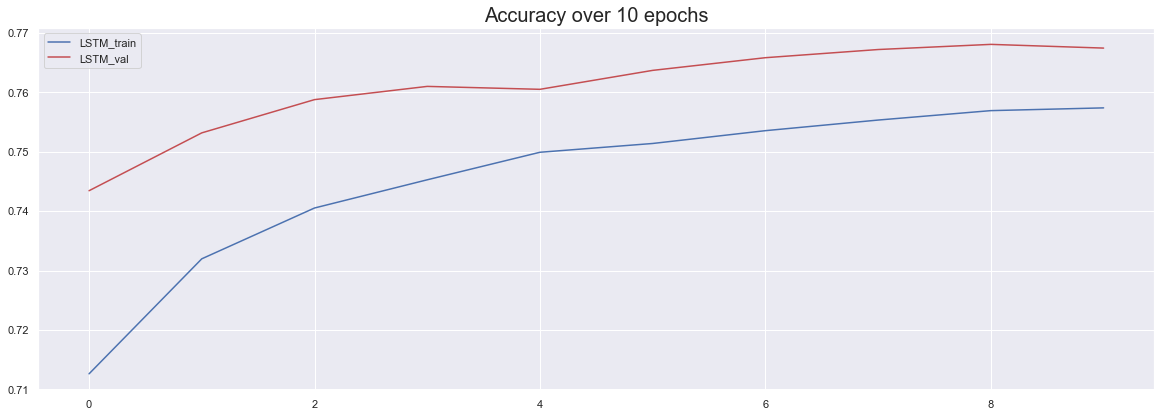

In [161]:
plt.plot(history.history['accuracy'], c= 'b')
plt.plot(history.history['val_accuracy'], c='r')
plt.legend(['LSTM_train', 'LSTM_val'], loc='upper left')
plt.title("Accuracy over 10 epochs", fontsize=20)

Text(0.5, 1.0, 'Loss over 10 epochs')

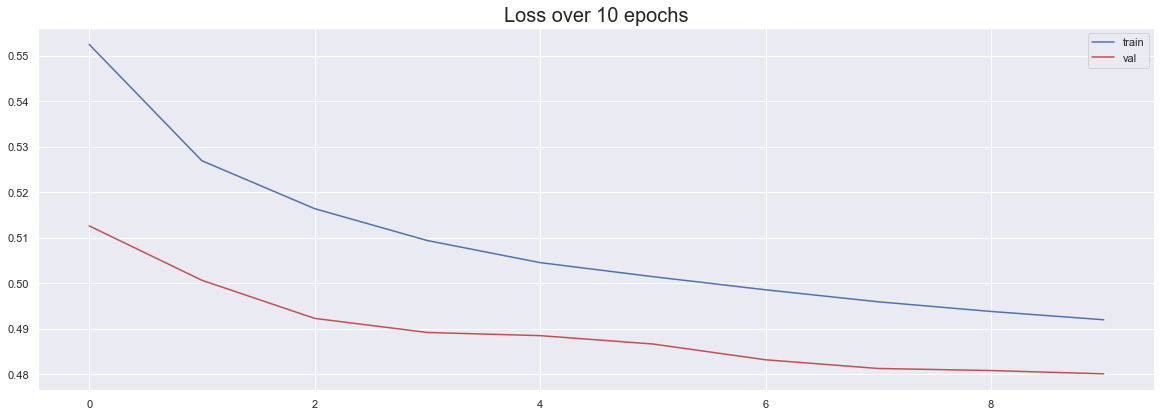

In [162]:
plt.plot(history.history['loss'], c= 'b')
plt.plot(history.history['val_loss'], c='r')
plt.legend(['train', 'val'], loc='upper right')
plt.title("Loss over 10 epochs", fontsize=20)

In [103]:
model.predict(np.array([X_test[13], X_test[12]]))

array([[0.7519741 ],
       [0.26766816]], dtype=float32)

In [106]:
print(y_test[13], y_test[12])

1 0


In [141]:
#IMPORTANT ARRAY MUST BE NUMPY ARRAY

X_test = np.array(X_test)

scores = model.predict(X_test, verbose=1, batch_size=10000) #batch size to lighten cpu load


13/13 [==============================] - 9s 702ms/step


In [142]:
def decode_sentiment(score):
    if score >= .50:
        return 1
    elif score < .50:
        return 0

In [143]:
y_pred = [decode_sentiment(x[0]) for x in scores]

In [144]:
from sklearn.metrics import confusion_matrix, accuracy_score

cnf_matrix = confusion_matrix(y_test, y_pred)
acc_score = accuracy_score(y_test, y_pred)
print(acc_score)

0.7674296875


Text(0.5, 1, 'Confusion Matrix for binary classification of Tweets')

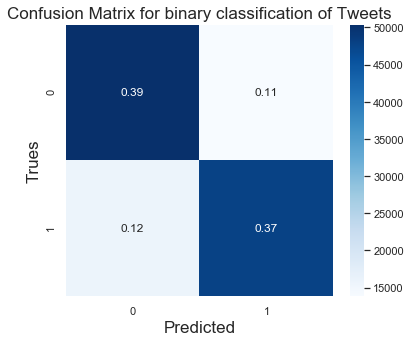

In [167]:
import seaborn as sns

relative_matrix = cnf_matrix/len(scores)

plt.figure(figsize=(6,5))
sns.heatmap(cnf_matrix, cmap=plt.cm.Blues, annot=relative_matrix)

plt.ylabel('Trues', fontsize=17)
plt.xlabel('Predicted', fontsize=17)
plt.title("Confusion Matrix for binary classification of Tweets", fontsize=17)

Text(0.5, 1.0, 'ROC-Curve for tweet Sentiments')

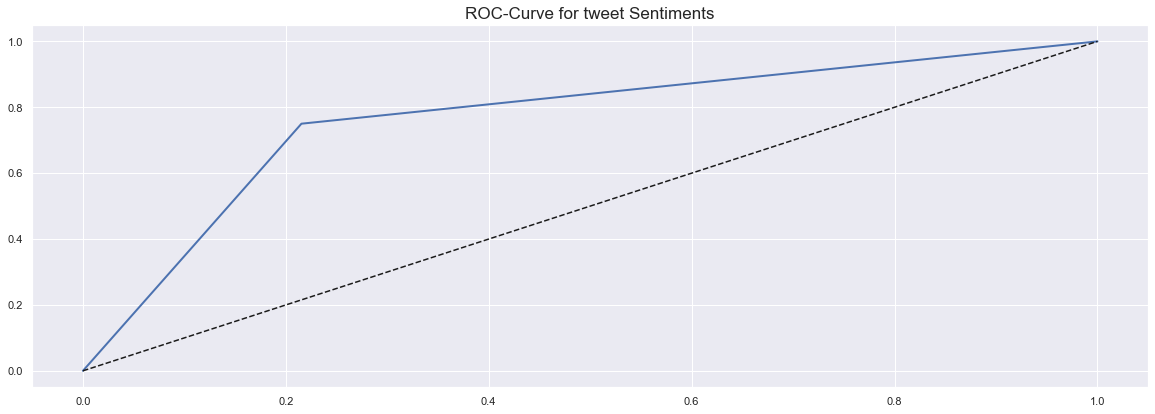

In [168]:
from sklearn.metrics import precision_recall_curve, roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.plot(fpr, tpr, linewidth=2, )
plt.plot([0,1], [0,1], 'k--')
plt.title('ROC-Curve for tweet Sentiments', fontsize=17)

# Going Further

In [150]:
def decode_sentiment(score):
    if score <= 0.20: # 0.0 - 0.2
        return 0
    elif score <= 0.40: # 0.2 - 0.4
        return 1
    elif score <= 0.60: # 0.4 - 0.6
        return 2
    elif score <= 0.80: # 0.6 - 0.8
        return 3
    elif score <= 1.00: # 0.8 - 1.0
        return 4

In [151]:
range_scores = [decode_sentiment(x[0]) for x in scores]

 Creating a new range of sentiments to add nuetral and leanings
 
 0 ----------- 1 ----------- 2 ----------- 3 ----------- 4 ----------- 5
 
 
 Negetive ------------------------- Nuetral ------------------- Positive

In [221]:
from sklearn.base import BaseEstimator, TransformerMixin

class TweetVectorizer(BaseEstimator, TransformerMixin):
    def __init__(self):
        return None
    
    def fit(self, X, y=None):
        return self
        
    def transform(self, X, y=None):
        X = X.apply(lambda x: clean_tweet(x, stem=True)) #cleaning and stemming
        X = pad_sequences(tokenizer.texts_to_sequences(X), maxlen=30)

        return np.array(X)

In [352]:
sample = TweetVectorizer().fit_transform(X=pd.Series(['''Apologies to Tesla customers for shifting delivery dates. It’s a crazy world out there!''']))

In [354]:
model.predict(sample)

array([[0.7589861]], dtype=float32)